# Chapter 1: Unconstrained convex optimization

*Selected Topics in Mathematical Optimization*

*2016-2017*

**Bernard De Baets**

**Michiel Stock**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from ipywidgets import interact, FloatSlider

%matplotlib inline

In this first chapter we will explore several algorithms to minimize convex unconstrained function

## Backtracking line search

The outline of a general descent algorithm is given in the following pseudocode.

>**input** starting point $x\in$ **dom** $f$.
>**repeat** 
>
>>    1. Determine a descent direction $\Delta x$.
>>    2. *Line seach*. Choose a step size $t>0$.
>>    3. *Update*. $x:=x+t\Delta x$.
>
>**until** stopping criterion is satisfied.

>**output** $x$


The specific optimization algorithms are hence determined by:
* method for determining the step size $\Delta x$, this is usually based on the gradient of $f$
* method for choosing the step size $t$, may be fixed or adaptive
* the criterion used for terminating the descent, usually the algorthm stops when the improvement is smaller than a predefined value

### Exact line search

As a subroutine of the general descent algorithm a line search has to be performend. A $t$ is chosen to minimize $f$ along the ray $\{x+t\Delta x \mid t\geq0\}$:

$$
t = \text{arg min}_{s\geq0}\ f(x+t\Delta x)\,.
$$

Exact line search is used when the cost of solving the above minimization problem is small compared to the cost of calculating the search direction itself. This is sometimes the case when an analytical solution is available.

### Inexact line search

Often, the descent methods work well when the line search is done only approximately. This is because the computational resourches are better spend to performing more *approximate* steps in the differnt directions because the direction of descent will change anyway.

Many methods exist for this, we will consider the *backtracking line search*, described by the following pseudocode.

>**input** starting point $x\in$ **dom** $f$, descent direction $\Delta x$, $\alpha\in(0,0.05)$ and $\beta\in(0,1)$.
>
> $t:=1$
>
>**while** $f(x+t\Delta x) > f(x) +\alpha t \nabla f(x)^\intercal\Delta x$
>
>>    $t:=\beta t$
>

>**output** $t$

**Assignment 1**
1. Complete the code for the backtracking line search
2. Use this function find the step size $t$ to (approximately) minimize $f(x) = x^2 - 2x - 5$ starting from the point $0$. Choose a $\Delta x=10$.

In [3]:
    function = lambda x : x**2 - 2*x - 5
    gradient_function = lambda x : 2*x -2
    backtracking_line_search(function, 0, 10, gradient_function)
    

0.1296

In [2]:
from unconstrained import backtracking_line_search

In [ ]:
from teachingtools import show_inexact_ls

interact(show_inexact_ls,
         alpha=FloatSlider(min=0.01, max=0.5, step=0.05, value=0.2),
        beta=FloatSlider(min=0.5, max=0.99, step=0.025, value=0.8),
        dx=FloatSlider(min=1, max=20, step=1, value=10))

**Describe the effect of $\alpha$, $\beta$ and $\Delta x$. How can you perform a more precise search?**

YOUR ANSWER HERE

## Gradient-based methods

### Some toy examples

To illustrate the algorithms, we introduce two toy functions to minimize:
    
* Simple quadratic problem:

$$
f(x_1, x_2) = \frac{1}{2} (x_1^2 +\gamma x_2^2)\,,
$$
where $\gamma$ determines the condition number.

* A non-quadratic function:
$$
f(x_1, x_2) = \log(e^{x_1 +3x_2-0.1}+e^{x_1 -3x_2-0.1}+e^{-x_1 -0.1})\,.
$$

In [4]:
from teachingtools import plot_contour, add_path  # functions for showing the toy examples
from teachingtools import quadratic, grad_quadratic, hessian_quadratic
from teachingtools import nonquadratic, grad_nonquadratic, hessian_nonquadratic

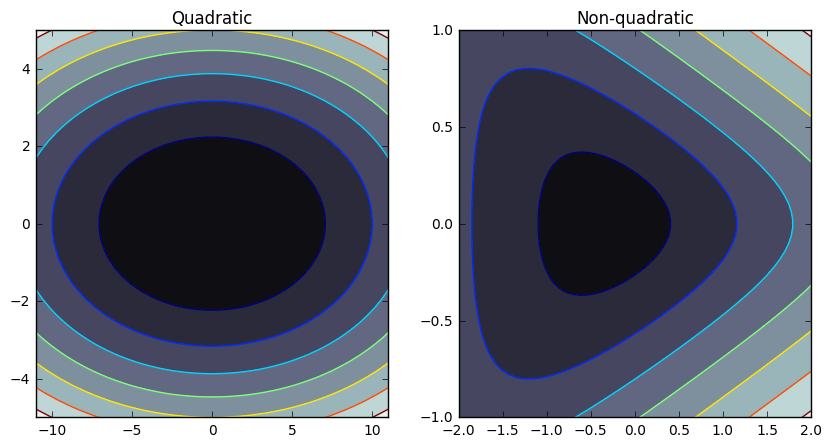

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1)
ax1.set_title('Quadratic')
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2)
ax2.set_title('Non-quadratic')

## Gradient descent

A natural choise for the search direction is the negative gradient: $\Delta x = -\nabla f(x)$. This algorithm is called the *gradient descent algorithm*.

>**input** starting point $x\in$ **dom** $f$.
>
>**repeat** 
>
>>    1. $\Delta x := -\nabla f(x)$.
>>    2. *Line seach*. Choose a step size $t$ via exact or backtracking line search.
>>    3. *Update*. $x:=x+t\Delta x$.
>
>**until** stopping criterion is satisfied.

>**output** $x$

The stopping criterion is usually of the form $||\nabla f(x)||_2 \leq \nu$.

**Assignment 2**
1. Complete the implementation of the gradient descent method.
2. Plot the paths for the two toy problems.
3. Experiment with $\alpha$ and $\beta$ (see also a small analysis of these parameters).
4. Analyze the convergence
5. Describe the effect of the condition number.

    def gradient_descent(f, x0, grad_f, alpha=0.2, beta=0.7, nu=1e-3, trace=False):
        '''
        General gradient descent algorithm.
        Inputs:
            - f: function to be minimized
            - x0: starting point
            - grad_f: gradient of the function to be minimized
            - alpha: parameter for btls
            - beta: parameter for btls
            - nu: parameter to determine if the algortihm is convered
            - trace: (bool) store the path that is followed?
        Outputs:
            - xstar: the found minimum
            - x_steps: path in the domain that is followed (if trace=True)
            - f_steps: image of x_steps (if trace=True)
        '''
        x = x0  # initial value
        if trace: x_steps = [x0.copy()]
        if trace: f_steps = [f(x0)]
        while True:
            # ...  # choose direction
            if # ...
                break  # converged
            # ...
            if trace: x_steps.append(x.copy())
            if trace: f_steps.append(f(x))
        if trace: return x, x_steps, f_steps
        else: return x

In [ ]:
from unconstrained import gradient_descent

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2)

xstar_q, x_steps_q, f_steps_q = gradient_descent(quadratic, np.array([[10.0], [1.0]]), 
                                                 grad_quadratic, nu=1e-5, trace=True)
add_path(ax1, x_steps_q, 'red')

print('Number of steps quadratic function: {}'.format(len(x_steps_q) - 1))

xstar_nq, x_steps_nq, f_steps_nq = gradient_descent(nonquadratic, np.array([[-0.5], [0.9]]),
                                                    grad_nonquadratic, nu=1e-5, trace=True)
add_path(ax2, x_steps_nq, 'red')

print('Number of steps non-quadratic function: {}'.format(len(f_steps_nq) - 1))

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.plot(np.abs(f_steps_q))
ax1.semilogy()
ax2.plot(np.abs(f_steps_nq[:-1] - f_steps_nq[-1]))  # error compared to last step
ax2.semilogy()

for ax in (ax1, ax2):
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Absolute error')

**Describe the convergence**

YOUR ANSWER HERE

Let us assess the effect of the hyperparameters of $\alpha$ and $\beta$ of the inexact line search.

In [ ]:
alphas = np.linspace(0.01, 0.3, num=10)  # alphas to explore
betas = np.linspace(0.01, 0.99, num=15)  # betas to explore

steps_to_convergence = np.zeros((len(alphas), len(betas)))

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        xstar_q, x_steps_q, f_steps_q = gradient_descent(nonquadratic,
                                                np.array([[10.0], [1.0]]), 
                                                 grad_nonquadratic, nu=1e-5, trace=True,
                                                alpha=alpha, beta=beta)
        steps_to_convergence[i, j] = len(f_steps_q) - 1

In [ ]:
A, B = np.meshgrid(alphas, betas)
fig, ax = plt.subplots()

cs = ax.contourf(A,B,  np.log10(steps_to_convergence).T, cmap='hot')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel(r'$\beta$')
ax.set_title('$\log_{10}$ of number of steps until convergence\nnon-quadratic curve')
cbar = fig.colorbar(cs)

**Describe the effect of $\alpha$, $\beta$.**

YOUR ANSWER HERE

Furthermore let us see what the effect is of the condition number on the number of steps until convergence. We will explore this for the quadratic function.

In [ ]:
condition_numbers = np.logspace(0, 3, num=25)
steps_to_convergence = np.zeros_like(condition_numbers)

for i, gamma in enumerate(condition_numbers):
    xstar_q, x_steps_q, f_steps_q = gradient_descent(lambda x:quadratic(x, gamma=gamma),
                                                     np.array([[10.0], [1.0]]), 
                                                 lambda x:grad_quadratic(x, gamma=gamma),
                                                     nu=1e-5, trace=True)
    steps_to_convergence[i] = len(f_steps_q) - 1  # number of steps

In [ ]:
fig, ax = plt.subplots()
ax.plot(condition_numbers, steps_to_convergence)
ax.loglog()
ax.set_ylabel('Number of steps\nuntil convergence')
ax.set_xlabel('Condition number')

**Describe the effect of the condition number.**

YOUR ANSWER HERE

## Steepest descent and coordinate descent

Optimize the first-order Taylor approximation of a function:

$$
f(x+v) \approx \hat{f}(x+v) =f(x) +\nabla f(x)^T v\,.
$$

How to choose $v$ to make $\nabla f(x)^T v$ as negative as possible? Size of $v$ has to be limited!

**Nomrizalized steepest descent direction**:

$$
\Delta x_{nsd} = \text{arg min} \{\nabla f(x)^T v \mid ||v||\leq 1 \}
$$

Some examples of different norms:

In [ ]:
from teachingtools import show_steepest_descent_gradientens
    
# plot contours
fig, ax = plt.subplots(figsize=(8, 9))
ax.set_aspect('equal')
x = np.array([0.7, -0.5])
#x = np.array([-1.5, 0.5])  #  other point
show_steepest_descent_gradientens(x=x, ax=ax)

Using the $L_1$ norm results in coordinate descent.

>**input** starting point $x\in$ **dom** $f$.
>
>**repeat** 
>
>>    1. *Direction*. Choose $i$ such that $|\nabla f(x)_i|$ is maximal.
>>    2. *Choose direction*. $\Delta x := -\nabla f(x)_i e_i$
>>    3. *Line seach*. Choose a step size $t$ via exact or backtracking line search.
>>    4. *Update*. $x:=x+t\Delta x$.
>
>**until** stopping criterion is satisfied.

>**output** $x$

Here, $e_i$ is the $i$-th basic vector.

The stopping criterion is usually of the form $||\nabla f(x)||_2 \leq \nu$.

**Assignment 3**
1. Complete the implementation of the coordinate descent method.
2. Plot the paths for the two toy problems.
3. Analyze the convergence

In [ ]:
from unconstrained import coordinate_descent

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2)

xstar_q, x_steps_q, f_steps_q = coordinate_descent(quadratic, np.array([[10.1], [1.0]]), 
                                                 grad_quadratic, nu=1e-5, trace=True)
add_path(ax1, x_steps_q, 'red')

print('Number of steps quadratic function: {}'.format(len(x_steps_q) - 1))

xstar_nq, x_steps_nq, f_steps_nq = coordinate_descent(nonquadratic, np.array([[-0.5], [0.9]]),
                                                    grad_nonquadratic, nu=1e-5, trace=True)
add_path(ax2, x_steps_nq, 'red')

print('Number of steps non-quadratic function: {}'.format(len(f_steps_nq) - 1))

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.plot(np.abs(f_steps_q))
ax1.semilogy()
ax2.plot(np.abs(f_steps_nq[:-1] - f_steps_nq[-1]))  # error compared to last step
ax2.semilogy()

for ax in (ax1, ax2):
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Absolute error')

**Describe the convergence of coordinate descent compared to gradient descent.**

YOUR ANSWER HERE

## Newton's method

In Newton's method the descent direction is chosen as

$$
\Delta x_\text{nt} = -\nabla^2f(x)^{-1} \nabla f(x)\,,
$$
which is called the *Newton step*. Here $\nabla^2f(x)^{-1}$ is the inverse of the Hessian of $f$.

If $f$ is convex, then $\nabla^2f(x)$ is positive definite and
$$
\nabla f(x)^\intercal \Delta x_\text{nt} \geq 0\,,
$$
hence the Newton step is a descent direction unless $x$ is optimal.

This Newton step can be motivated in several ways.

### Motivation 1: minimizer of a second order approximation

The second order Taylor approximation $\hat{f}$ of $f$ at $x$ is

$$
\hat{f}(x+v) = f(x) + \nabla f(x)^\intercal v + \frac{1}{2} v^\intercal \nabla^2 f(x) v\,
$$

which is a convex quadratic function of $v$, and is minimized when $v=\Delta x_\text{nt}$.

This quadratic model will be particulary accuate when $x$ is near the minimum.

### Motivation 2: affine invariance of the Newton step

to be completed

### Newton decrement

The Newton decrement is defined as
$$
\lambda(x)  = (\nabla f(x)^\intercal\nabla^2 f(x)\nabla f(x))^{1/2}\,.
$$

This can be related to the quantity $f(x)-\text{inf}_y\ \hat{f}(y)$:
$$
f(x)-\text{inf}_y\ \hat{f}(y) = f(x) - \hat{f}(x +\Delta x_\text{nt}) = \frac{1}{2} \lambda(x)^2\,.
$$
Thus $\frac{1}{2} \lambda(x)^2$ is an istimate of $f(x) - p^*$, based on the quadratic approximation of $f$ at $x$. 

### Pseudocode of Newton's algorithm

>**input** starting point $x\in$ **dom** $f$.
>
>**repeat** 
>
>>    1. Compute the Newton step and decrement $\Delta x_\text{nt} := -\nabla^2f(x)^{-1} \nabla f(x)$; $\lambda^2:=\nabla f(x)^\intercal\nabla^2 f(x)\nabla f(x)$. 
>>    2. *Stopping criterion* **break** if $\lambda^2/2 \leq \epsilon$.
>>    2. *Line seach*. Choose a step size $t$ via exact or backtracking line search.
>>    3. *Update*. $x:=x+t\Delta x$.
>
>**until** stopping criterion is satisfied.

>**output** $x$

The above algorithm is sometimes called the *damped* Newton method, as it uses a variable step size $t$.

**Assignment 4**
1. Complete the code for Newton's method.
2. Find the minima of the two toy problems.
3. Compare the different methods for condition number and rotating the quadratic curve.
4. Compare the different with resprect to the scalability towards higher dimentional problems.

    def newtons_method(f, x0, grad_f, hess_f, alpha=0.3, beta=0.8, epsilon=1e-3, trace=False):
        '''
        Newton's method for minimizing functions.
        Inputs:
            - f: function to be minimized
            - x0: starting point
            - grad_f: gradient of the function to be minimized
            - hess_f: hessian matrix of the function to be minimized
            - alpha: parameter for btls
            - beta: parameter for btls
            - nu: parameter to determine if the algortihm is convered
            - trace: (bool) store the path that is followed?
        Outputs:
            - xstar: the found minimum
            - x_steps: path in the domain that is followed (if trace=True)
            - f_steps: image of x_steps (if trace=True)
        '''
        x = x0  # initial value
        if trace: x_steps = [x.copy()]
        if trace: f_steps = [f(x0)]
        while True:
            # ...
            if # ...  # stopping criterion
                break  # converged
            # ...
            if trace: x_steps.append(x.copy())
            if trace: f_steps.append(f(x))
        if trace: return x, x_steps, f_steps    
        else: return x

In [ ]:
from unconstrained import newtons_method

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2)

xstar_q, x_steps_q, f_steps_q = newtons_method(quadratic, np.array([[10.0], [1.0]]),
                                grad_quadratic, hessian_quadratic, epsilon=1e-8, trace=True)
add_path(ax1, x_steps_q, 'red')

print('Number of steps quadratic function: {}'.format(len(x_steps_q) - 1))

xstar_nq, x_steps_nq, f_steps_nq = newtons_method(nonquadratic, np.array([[-0.5], [0.9]]), 
                                grad_nonquadratic, hessian_nonquadratic, epsilon=1e-8, trace=True)
add_path(ax2, x_steps_nq, 'red')

print('Number of steps non-quadratic function: {}'.format(len(x_steps_nq) - 1))

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.plot(f_steps_q)
ax1.semilogy()
ax2.plot(f_steps_nq)

for ax in (ax1, ax2):
    ax.set_xlabel('iteration')
    ax.set_ylabel('function value')

#### Effect of condtition number and rotations.

Below is an applet to demonstrate the effect of 1) changing the condition problem of the quadratic function and 2) rotating the function such that the axes of the ellipsis are no longer alligned with the coordinate axes. 

In [ ]:
def show_condition(gamma, theta):
    quad_gamma = lambda x : quadratic(x, gamma, theta)
    x0 = np.array([[10.], [1.]])
    d_quad_gamma = lambda x : grad_quadratic(x, gamma, theta)
    dd_quad_gamma = lambda x : hessian_quadratic(x, gamma, theta)
    xstar_gd, x_steps_gd, f_steps_gd = gradient_descent(quad_gamma,
                                                    x0.copy(),
                                                     d_quad_gamma,
                                                     nu=1e-6, trace=True)
    xstar_cd, x_steps_cd, f_steps_cd = coordinate_descent(quad_gamma,
                                                    x0.copy(),
                                                     d_quad_gamma,
                                                     nu=1e-6, trace=True)
    xstar_nm, x_steps_nm, f_steps_nm = newtons_method(quad_gamma, x0.copy(),
                                                   d_quad_gamma, dd_quad_gamma, epsilon=1e-6, trace=True)
    fig, ax1 = plt.subplots(ncols=1, figsize=(10, 10))
    plot_contour(quad_gamma, [-10, 10], [-11, 11], ax1)
    add_path(ax1, x_steps_gd, 'b', label='GD')
    add_path(ax1, x_steps_cd, 'r', label='CD')
    add_path(ax1, x_steps_nm, 'g', label='NM')
    ax1.legend(loc=3)
    print('Gradient descent iterations: {}'.format(len(x_steps_gd) - 1 ))
    print('Coordinate descent iterations: {}'.format(len(x_steps_cd) - 1 ))
    print('Newton\'s iterations: {}'.format(len(x_steps_nm) - 1))

In [ ]:
interact(show_condition, gamma=FloatSlider(min=0.1, max=20.0, step=0.1, value=1),
            theta=FloatSlider(min=0, max=np.pi / 2, step=0.1, value=0))

**Describe the effect of the conditional number and rotations on the path of the different optimization algorithms.**

YOUR ANSWER HERE

### Scalability of the different algorithms

To study scaling towards higher dimensional problems, we minimize a function of the following form:

$$
f(x)  = x^T C x - \sum_{i=1}^m \log(b_i - a_i^Tx)
$$

with $C$ a positive-definite matrix and $b_i$ and $a_i$ positive. 

We will optimize such a function in 20, 100 and 250 dimensions.

In [ ]:
from teachingtools import make_general_multidim_problem

In [ ]:
n_sizes = [20, 100, 250]
m_sizes = [100, 300, 1000]


fig, axes = plt.subplots(ncols=3, figsize=(20, 7))

for (n, m, ax) in zip(n_sizes, m_sizes, axes):
    f, g_f, h_f = make_general_multidim_problem(n, m)

    xstar_gd, x_steps_gd, f_steps_gd = gradient_descent(f, np.zeros((n, 1)), 
                                g_f, nu=1e-3, trace=True)

    xstar_cd, x_steps_cd, f_steps_cd = coordinate_descent(f, np.zeros((n, 1)), 
                                g_f, nu=1e-3, trace=True)
    
    xstar_newton, x_steps_newton, f_steps_newton = newtons_method(f, np.zeros((n, 1)), 
                                g_f, h_f, epsilon=1e-8, trace=True)
    
    ax.plot(np.abs(f_steps_gd - f_steps_gd[-1]), label='Gradient desc.')
    ax.plot(np.abs(f_steps_cd - f_steps_cd[-1]), label='Coordinate desc.')
    ax.plot(np.abs(f_steps_newton - f_steps_newton[-1]), label='Newton method')
    
    ax.loglog()
    ax.legend(loc=0)
    ax.set_title('$n$={}, $m$={}'.format(n, m))
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Absolute error')

**Discuss the different algorithms with respect to their scalability.**

YOUR ANSWER HERE

### Summary Newton's method
* Convergence of Newton's algorithm is rapid and quadratic near $x^*$
* Newton's algorithm is affine invariant, e.g. invariant to choice of coordinates or condition number
* Newton's algorithm scales well with problem size
* The hyperparameters $\alpha$ and $\beta$ do not infuence the performance much.

## Quasi-Newton methods

When the dimensionality of the problem is too large => approximate the Hessian

to be completed

* Hessian cannot calculated or be stored
* Finite difference methods
* approximation!
* Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm

**Assignment 5**

Use the BFGS algorithm implemented in Scipy to find the minimum of the two toy problems. Visualize the paths of the algorithm on the two contour plots and the convergence (cfr. earlier).

The BFGS algorithm can be used as follows:

In [ ]:
from scipy.optimize import minimize

**HINT**: use the `callback` argument to get the path and the function evaluations throughout the run.

In [ ]:
?minimize

In [ ]:
x_steps_q = []
f_steps_q = []
minimize(quadratic, np.array([[10.0], [1.0]]),
             method='BFGS', 
            callback=lambda x:(x_steps_q.append(x),
                               f_steps_q.append(quadratic(x))))

print('Number of steps quadratic function: {}'.format(len(x_steps_q) - 1))

x_steps_nq = []
f_steps_nq = []
minimize(nonquadratic, np.array([[-0.5], [0.9]]), method='BFGS',
            callback=lambda x:(x_steps_nq.append(x),
                               f_steps_nq.append(quadratic(x))))

print('Number of steps non-quadratic function: {}'.format(len(x_steps_nq) - 1))

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
plot_contour(quadratic, (-11, 11), (-5, 5), ax1)
plot_contour(nonquadratic, (-2, 2), (-1, 1), ax2)

add_path(ax1, x_steps_q, 'red')
add_path(ax2, x_steps_nq, 'red')

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.plot(f_steps_q)
ax1.semilogy()
ax2.plot(f_steps_nq)

for ax in (ax1, ax2):
    ax.set_xlabel('iteration')
    ax.set_ylabel('function value')

## Project 1: logistic regression
![Classification using logistic regression](Figures/classification.png)

In this project we will use gradient-based optimization to train a logistic regression model.

Consider the following problem: we have a dataset of $n$ instances: $T=\{(\mathbf{x}_i, y_i)\mid i=1\ldots n\}$. Here $\mathbf{x}_i\in \mathbb{R}^p$ is a $p$-dimensional feature vector and $y_i\in\{0,1\}$ is a binary label. This a a binary classification problem, we are interested in predicting the label of an instance based on its feature description. The goal of logistic regression is to find a function $f(\mathbf{x})$ that estimates the conditional probability of $Y$:

$$
\mathcal{P}(Y=1 \mid \mathbf{X} = \mathbf{x})\,.
$$

We will assume that this function $f(\mathbf{x})$ is of the form

$$
f(\mathbf{x}) = \sigma(\mathbf{w}^\intercal\mathbf{x})\,,
$$

with $\mathbf{w}$ a vector of parameters to be learned and $\sigma(.)$ the logistic map:

$$
\sigma(t) = \frac{e^{t}}{1+e^{t}}=\frac{1}{1+e^{-t}}\,.
$$

It is easy to see that the logistic mapping will ensure that $f(\mathbf{x})\in[0, 1]$, hence $f(\mathbf{x})$ can be interpretated as a probability. 

To find the best weights that separate the two classes, we can use the following loss function:

$$
\mathcal{L}(\mathbf{w})=-\sum_{i=1}^n[y_i\log(\sigma(\mathbf{w}^\intercal\mathbf{x}_i))+(1-y_i)\log(1-\sigma(\mathbf{w}^\intercal\mathbf{x}_i))] +\lambda \mathbf{w}^\intercal\mathbf{w}\,.
$$

Here, the first part is the cross entropy, which penalizes disagreement between the prediction $f(\mathbf{x}_i)$ and the true label $y_i$, while the second term penalizes complex models in which $\mathbf{w}$ has a large norm. The trade-off between these two components is controlled by $\lambda$, a hyperparameters. In the course *Predictive modelling* it is explained that by carefully tuning this parameter one can obtain an improved performance. **In this project we will study the influence $\lambda$ on the convergence of the optimization algorithms.**

Below is a toy example in two dimensions illustrating the loss function.

In [ ]:
from teachingtools import logistic_toy

In [ ]:
interact(logistic_toy, separation=FloatSlider(min=0, max=4, step=0.2, value=1), 
         log_lambda=FloatSlider(min=-5, max=5, step=1, value=1))

**Data overview**

Consider the dataset in the file `BreastCancer.csv`. This dataset contains information about 569 female patients diagnosed with breast cancer. For each patient it was recorded wether the tumor was begnin (B) or malignant (M), this is the response variable. Each tumor is described by 30 features, which encode some information about the tumor. We want to use logistic regression with regularization to predict wether a tumor is begnin or malignant based on these features.

In [ ]:
import pandas as pd  # pandas allows us to confortably work with datasets in python

cancer_data = pd.DataFrame.from_csv('Data/BreastCancer.csv')  # load data
cancer_data.head()  # show first five rows

In [ ]:
# extract response in binary encoding:
# 0 : B(egnin)
# 1 : M(alignant)
binary_response = np.array(list(map(int, cancer_data.y == 'M')))

# extract feature matrix X
features = cancer_data.select(lambda colname : colname[0] == 'x', axis=1).values

# standarizing features
# this is needed for gradient descent to run faster
features -= features.mean(0)
features /= features.std(0)

**Project assignment**

1. Implement the loss function for logistic loss, the gradient and the Hessian of this loss function. These functions have as imput the parameter vector $\mathbf{w}$, label vector $\mathbf{y}$, feature matrix $\mathbf{X}$ and $\lambda$. The logistic map and cross-entropy is already provided for you.
2. Consider $\lambda=0.1$, find the optimal parameter vector for this data using gradient descent, coordinate descent, Newton's algorithm and the BFGS algorithm. Use standarized features. For each algorithm, give the number of steps the algorithm performed and the running time (use the [magic function](https://ipython.org/ipython-doc/3/interactive/magics.html) `%timeit`). Compare the loss for each of parameters obtained by the different algorithms.
3. How does regularization influence the optimization? Make a separate plot for gradient descent, Newton's method and the the BFGS algorithm with the the value of the loss as a function of the iteration of the given algorithm. Make separate graphs for $\lambda = [10^{-7}, 10^{-5}, 10^{-3}, 10^{-1}, 1, 10, 100]$. Does increased regularization make the optimization go faster or slower? Why does this make sense?

**Project assignment 1**

Complete the functions below.

In [ ]:
# COMPLETE THIS FOR QUESTION 1

logistic_map = lambda x : 1 / (1 + np.exp(-x))
cross_entropy = lambda l, p : - (l * np.log(p))[p>0]  # so that no nan is returned when p is very small

def logistic_loss(w, y, X, lamb):
    """
    Implement the logistic loss
    returns a scalar
    """
    return

def grad_logistic_loss(w, y, X, lamb):
    """
    Implement the gradient of the logistic loss
    returns a column vector
    """
    return

def hess_logistic_loss(w, y, X, lamb):
    """
    Implement the Hessian of the logistic loss
    returns a matrix
    """
    return

In [ ]:
# functions for first question

l_loss = lambda w : logistic_loss(w, binary_response, features, 0.1)
l_grad = lambda w : grad_logistic_loss(w, binary_response, features, 0.1)
l_hess = lambda w : hess_logistic_loss(w, binary_response, features, 0.1)

**Project assignment 2**

Use gradient descent, coordinate descent, Newton's method and BFGS method to find the parameters of the logistic model ($\lambda=0.1).

DISCUSS THE DIFFERENCE IN RUNNING TIME

**Project assignment 3**

Make a plot for each of the four optimization method in which you show 

## References

Boyd, S. and Vandenberghe, L. *'Convex Optimization'*. Cambridge University Press (2004) [link](https://stanford.edu/~boyd/cvxbook/)